# Detecção de outliers

## Gerar dataset

1000 empresas ficticias geradas randomicamente com valuations entre 10M e 100M

In [159]:
# generate a list of 1000 companies with names randomly generated from a list of words and random valuations beteween 10M and 100M on a normal distribution
# with 10 outliers with valuations above 1B and bellow 1M save the list to a csv file (commented out)

import random
import csv

companies = []
words = ["apple", "banana", "cherry", "date", "elderberry", "fig", "grape", "honeydew", "kiwi", "lemon", "mango", "nectarine", "orange", "pear", "quince", "raspberry", "strawberry", "tangerine", "ugli", "watermelon"]

for i in range(1000):
    name = random.choice(words) + " " + random.choice(words)
    valuation = random.gauss(55, 15)
    companies.append([name, valuation])

# for i in range(1000):
#     name = random.choice(words) + " " + random.choice(words)
#     valuation = random.randint(100, 200)
#     companies.append([name, valuation])

# for i in range(10):
#     name = random.choice(words) + " " + random.choice(words)
#     valuation = random.randint(1, 100)
#     companies.append([name, valuation])

# for i in range(10):
#     name = random.choice(words) + " " + random.choice(words)
#     valuation = random.randint(200, 300)
#     companies.append([name, valuation])

## Salvar dataset

In [160]:
# save the list to a csv file
with open("companies.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerow(["name", "valuation"])
    writer.writerows(companies)

## Carregar dataset

In [161]:
# load the list from the csv file into a dataframe
import pandas as pd	
df = pd.read_csv("companies.csv")
df.head()

,name,valuation
0,quince strawberry,56.281230
1,banana date,40.516522
2,tangerine grape,55.792407
3,watermelon apple,78.629449
4,raspberry raspberry,88.594412


## Distribuição normal

O numero de empresas é o eixo y, o valor das empresas é o eixo x

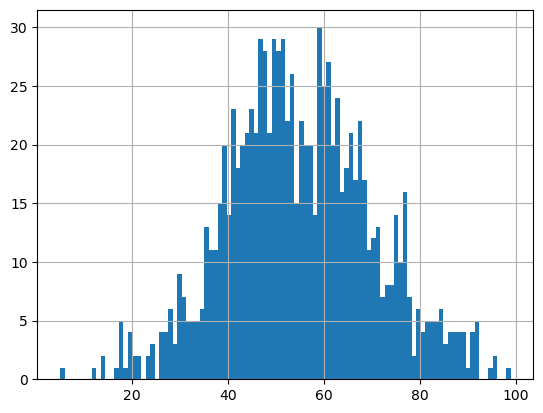

In [162]:
# show the distribution of valuations
import matplotlib.pyplot as plt
df["valuation"].hist(bins=100)
plt.show()

## Outliers com Z-Score

Z-Score: O Z-score mede quantos desvios padrão um ponto de dados está distante da média. Um limiar comum é 3 ou -3. Pontos de dados com um Z-score além desse intervalo são considerados outliers.

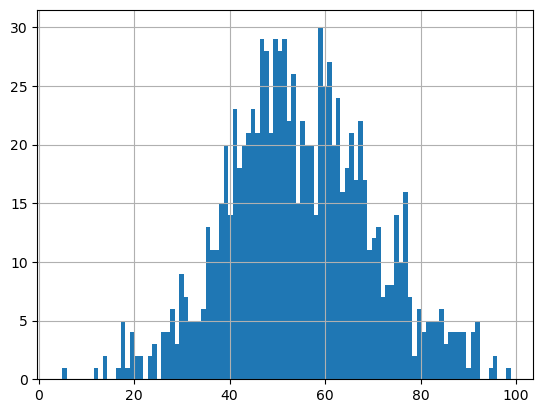

In [163]:
# show the distribution of valuations, with two bars representing outliers detected with z-score
import numpy as np
z = np.abs((df["valuation"] - df["valuation"].mean()) / df["valuation"].std())
df["outlier"] = z > 3
df["valuation"].hist(bins=100)
df[df["outlier"] == True]["valuation"].hist(bins=100)
plt.show()

In [164]:
# list the companies with outliers detected with z-score
df[df["outlier"] == True].head()

,name,valuation,outlier
246,ugli apple,5.001499,True


In [165]:
df[df["outlier"] == True].shape

(1, 3)

## Outliers com Z-Score (modificado para 2)

Z-Score: O Z-score mede quantos desvios padrão um ponto de dados está distante da média. Um limiar comum é 3 ou -3. Pontos de dados com um Z-score além desse intervalo são considerados outliers.

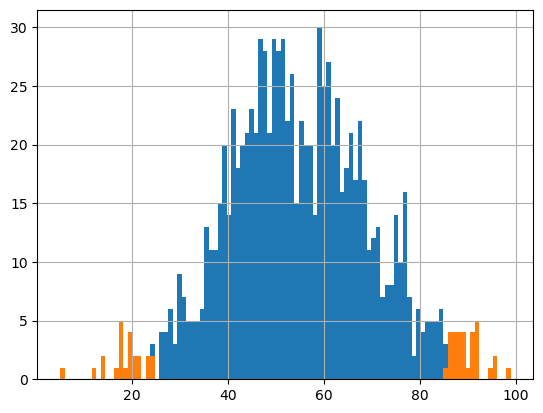

In [166]:
# show the distribution of valuations, with two bars representing outliers detected with z-score of 2
import numpy as np
z = np.abs((df["valuation"] - df["valuation"].mean()) / df["valuation"].std())
df["outlier"] = z > 2
df["valuation"].hist(bins=100)
df[df["outlier"] == True]["valuation"].hist(bins=100)
plt.show()

In [167]:
# list the companies with outliers detected with z-score of 2
df[df["outlier"] == True].head()

,name,valuation,outlier
4,raspberry raspberry,88.594412,True
20,pear raspberry,86.875084,True
32,nectarine honeydew,19.464332,True
96,pear cherry,21.094337,True
102,quince pear,88.920830,True


In [168]:
df[df["outlier"] == True].shape

(54, 3)

## Outliers com IQR

IQR (Intervalo Interquartil): Calcule o primeiro quartil (Q1) e o terceiro quartil (Q3). O IQR é Q3 - Q1. Outliers são tipicamente definidos como valores abaixo de Q1 - 1.5IQR ou acima de Q3 + 1.5IQR.

Limite inferior=Q1−1.5×IQR

Limite superior=Q3+1.5×IQR

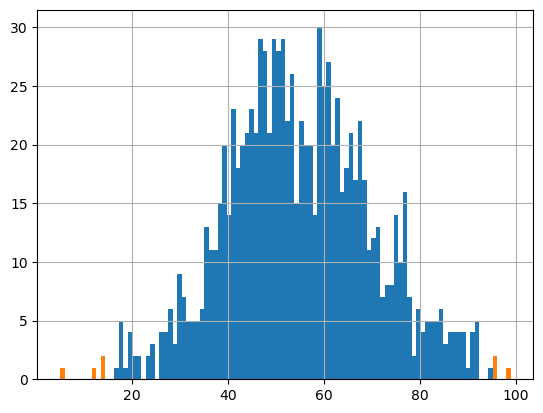

In [169]:
# show the distribution of valuations, with two bars representing outliers detected with iqr
q1 = df["valuation"].quantile(0.25)
q3 = df["valuation"].quantile(0.75)
iqr = q3 - q1
df["outlier"] = (df["valuation"] < q1 - 1.5 * iqr) | (df["valuation"] > q3 + 1.5 * iqr)
df["valuation"].hist(bins=100)
df[df["outlier"] == True]["valuation"].hist(bins=100)
plt.show()

In [170]:
# list the companies with outliers detected with iqr
df[df["outlier"] == True].head()

,name,valuation,outlier
246,ugli apple,5.001499,True
328,date orange,95.410303,True
858,honeydew pear,11.734993,True
872,raspberry watermelon,95.430991,True
892,fig honeydew,13.942524,True


In [171]:
df[df["outlier"] == True].shape

(7, 3)

## Outliers com LOF

Local Outlier Factor (LOF): Mede a densidade de desvio local de um determinado ponto de dados em relação aos seus vizinhos. Quanto menor a densidade de um ponto em comparação com seus vizinhos, mais provável que seja um outlier.

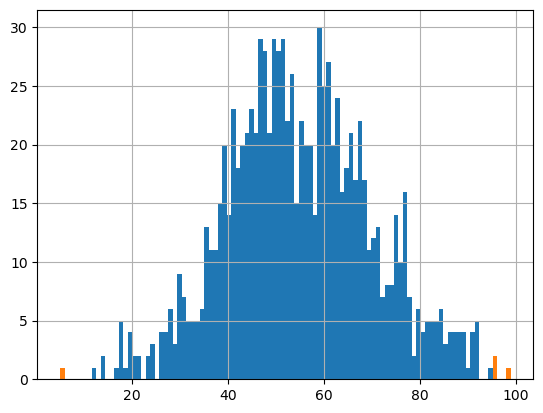

In [172]:
# show the distribution of valuations, with two bars representing outliers detected with lof
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20)
df["outlier"] = lof.fit_predict(df[["valuation"]])
df["valuation"].hist(bins=100)
df[df["outlier"] == -1]["valuation"].hist(bins=100)
plt.show()

In [173]:
# list the companies with outliers detected with lof
df[df["outlier"] == -1].head()

,name,valuation,outlier
246,ugli apple,5.001499,-1
328,date orange,95.410303,-1
872,raspberry watermelon,95.430991,-1
922,mango date,98.910900,-1


## Outliers com Isolation Forrest

Isolation Forest: Este algoritmo isola observações selecionando aleatoriamente uma característica e, em seguida, selecionando aleatoriamente um valor de divisão entre os valores máximo e mínimo da característica selecionada.

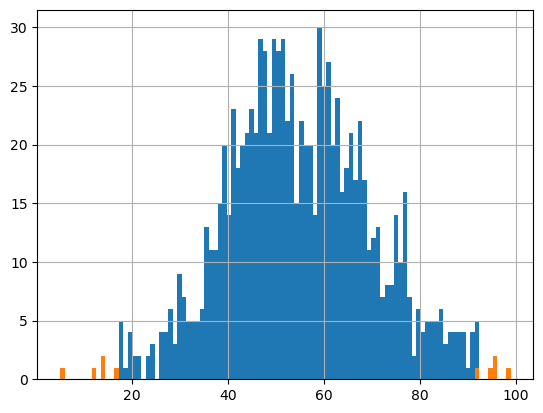

In [174]:
# show the distribution of valuations, with two bars representing outliers detected with isolation forest
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(contamination=0.01)
df["outlier"] = iforest.fit_predict(df[["valuation"]])
df["valuation"].hist(bins=100)
df[df["outlier"] == -1]["valuation"].hist(bins=100)
plt.show()

In [175]:
# list the companies with outliers detected with isolation forest
df[df["outlier"] == -1].head()

,name,valuation,outlier
157,banana banana,94.786911,-1
246,ugli apple,5.001499,-1
328,date orange,95.410303,-1
399,lemon cherry,16.938495,-1
676,nectarine ugli,92.236579,-1
